
# Project: Investigate TMDb movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> The TMDb movie dataset has been selected for the analysis. The dataset contains arround 10,866 movies including information such as budget, revenue, director, cast, user rating and etc. 

> The question has been explored is what kinds of properties are associated with movies that have high revenues?  

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

#### From the below inspections, following issues are discovered which will be fixed at data cleaning stage
1. certain columns like 'cast', 'genres',contain multiple values separated by '|'
2. certain columns like 'homepage','tagline', 'overview' are not revelent to the explored question
3. revenue(_adj) and budget(_adj) has zero value at min, 25%, 50% which requires further exploration  
3. dataset contains one duplicated row


In [2]:
# load dataset
df= pd.read_csv('tmdb-movies.csv')

In [3]:
#display a few rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# prints information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#Generates descriptive statistics of the dataframe
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# find any duplicate rows
sum(df.duplicated())

1

### Data Cleaning
Note that rows with null value will be dropped at data exploration stage. 

#### 1. Drop duplicated rows

In [7]:
df.drop_duplicates(inplace=True)

#### 2.  Drop non revelent columns 

In [8]:
df.drop (['homepage','tagline','overview','keywords'], axis = 1, inplace = True)

In [9]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### 3.  Number of zero revenue(_adj) and budget(_adj)
It can be seen that more than half of movies have zero revenue and budget which is unusual. Suspect that the actual revenue and budget is missing from the dataset. Rows with zero revenue will be dropped to avoid any misinterpration of the data   

In [10]:
#  find out the number of movies with zero adjusted revenue
df.query('revenue_adj==0').shape

(6016, 17)

In [11]:
# find out the number of movies with zero adjusted budget 
df.query('budget_adj==0').shape

(5696, 17)

In [12]:
#creat a new data frame only contains non zetro revenue
df = df.query('revenue_adj>0')

In [13]:
#check if the new dataframe is created correctly
df.query('revenue_adj==0').shape

(0, 17)

#### 4. Separate column 'genres'. 
column 'genres' contains multiple values which are separated

In [14]:
# Use the first value as movie's genre, assign column name 'generes_new'
df['genres_new'] = df['genres'].str.split("|", expand=True)[0]

# drop original column 'generes'
df.drop (['genres'], axis = 1, inplace = True)

#### 5. Separate column 'cast'

In [15]:
#column 'cast' contains 5 values, they are separated and assigned with column name 'cast_1' to 'cast_5'
df[['cast_1','cast_2','cast_3','cast_4','cast_5']]=df['cast'].str.split("|", expand=True)

#drop original column
df.drop (['cast'], axis = 1, inplace = True)

#### 5. Separate column 'director'

In [16]:
# Use the first value as movie's director, assign column name 'director_new'
df['director_new'] = df['director'].str.split("|", expand=True)[0]

# drop original column 'generes'
df.drop (['director'], axis = 1, inplace = True)

In [17]:
#check of value sepration has been done properly
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,runtime,production_companies,release_date,vote_count,...,release_year,budget_adj,revenue_adj,genres_new,cast_1,cast_2,cast_3,cast_4,cast_5,director_new
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,...,2015,1.379999e+08,1.392446e+09,Action,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Colin Trevorrow
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,...,2015,1.379999e+08,3.481613e+08,Action,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,George Miller
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,119,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,...,2015,1.012000e+08,2.716190e+08,Adventure,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Robert Schwentke
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,...,2015,1.839999e+08,1.902723e+09,Action,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,J.J. Abrams
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,137,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,...,2015,1.747999e+08,1.385749e+09,Action,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,James Wan


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 21 columns):
id                      4849 non-null int64
imdb_id                 4849 non-null object
popularity              4849 non-null float64
budget                  4849 non-null int64
revenue                 4849 non-null int64
original_title          4849 non-null object
runtime                 4849 non-null int64
production_companies    4753 non-null object
release_date            4849 non-null object
vote_count              4849 non-null int64
vote_average            4849 non-null float64
release_year            4849 non-null int64
budget_adj              4849 non-null float64
revenue_adj             4849 non-null float64
genres_new              4849 non-null object
cast_1                  4844 non-null object
cast_2                  4833 non-null object
cast_3                  4830 non-null object
cast_4                  4815 non-null object
cast_5                  4766 non-null o

## Question 1 : what kinds of properties are associated with movies that have high revenues?  

In this section the relationship between budget and movie genres, popularity, and release year will be explored respectively. 'revenue_adj' is used for fair comparison between different years

In [19]:
#define the column list that will be explored later.
column_list= ['release_year', 'genres_new',"revenue_adj",'popularity','budget_adj', 'director_new' ]

In [20]:
# select the defined column and Drop Null value 
df_q= df[column_list].dropna()

In [21]:
#convert revenue to million dollars
df_q['revenue_adj']=df_q['revenue_adj']/1e6

In [22]:
#convert budget to million dollars
df_q['budget_adj']=df_q['budget_adj']/1e6

In [23]:
df_q.head()

,release_year,genres_new,revenue_adj,popularity,budget_adj,director_new
0,2015,Action,1392.445893,32.985763,137.999939,Colin Trevorrow
1,2015,Action,348.161292,28.419936,137.999939,George Miller
2,2015,Adventure,271.619025,13.112507,101.199955,Robert Schwentke
3,2015,Action,1902.723130,11.173104,183.999919,J.J. Abrams
4,2015,Action,1385.748801,9.335014,174.799923,James Wan


### 1. This section is to investigate the the distribution (histogram) of movie revenue
from the following investigation, it can be seen that the revenue is heaily right skewed, with 54.68% of the movie revenue is less than 56.54 million U.S. dollors

In [24]:
# Reset figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams.update({'font.size': 22})

Text(0.5,1,'Movie Revenue')

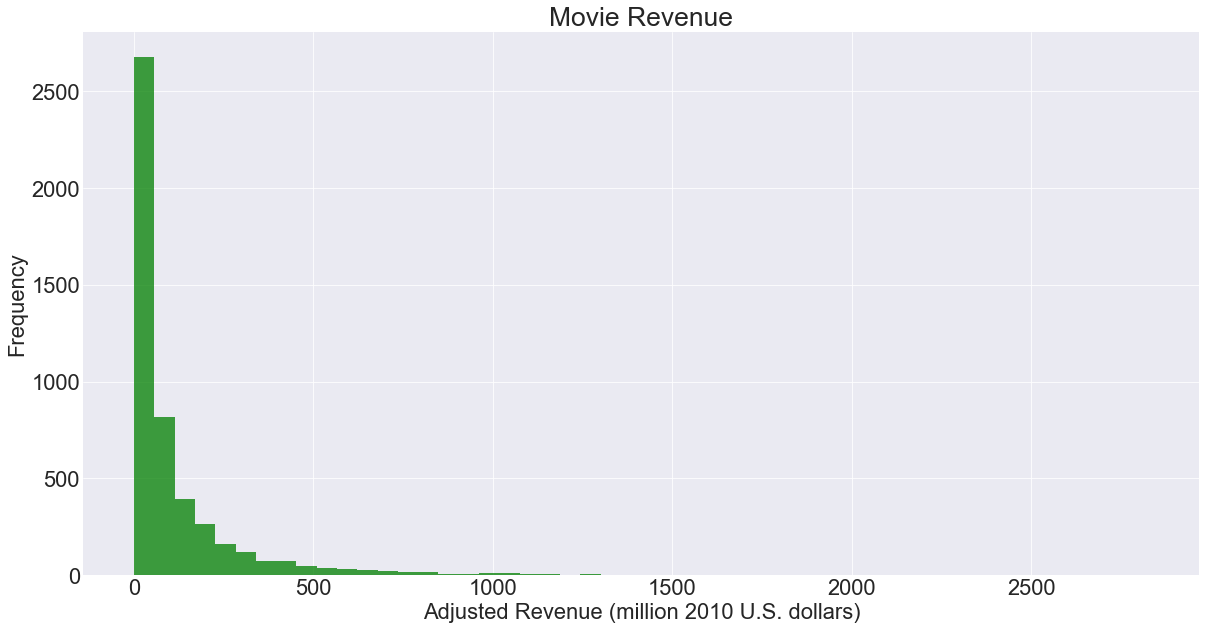

In [25]:
# plot histogram of the movie revenue
n, bins, patches = plt.hist(df_q['revenue_adj'], 50, facecolor='green', alpha=0.75)

# title and labels
plt.ylabel('Frequency')
plt.xlabel('Adjusted Revenue (million 2010 U.S. dollars)')
plt.title('Movie Revenue')

it can be seen that most of the movies'revenue fall in the first bin

In [26]:
# print mean revenue
print ('mean revenue is {} million dollars'.format(df_q['revenue_adj'].mean()))

mean revenue is 115.12233157113305 million dollars


In [27]:
# print median revenue
print ('median revenue is {} million dollars'.format(df_q['revenue_adj'].median()))

median revenue is 43.964048146636244 million dollars


In [28]:
#print standard deviation of revenue 
print ('revenue std is {} million dollars'.format(df_q['revenue_adj'].std()))

revenue std is 198.87057301933703 million dollars


In [29]:
# find out the percentage of the first bin
'{:,.2f}% of the movie revenue is less than {:,.2f} million U.S. dollors'.format(n[0]/4894*100,bins[1])

'54.66% of the movie revenue is less than 56.54 million U.S. dollors'

###  2. This section is to investigate which type(s) of movie is more likely to have high revenue?

Mean revenue of each genre group is caculated. Then the bar chart of movie genre and mean revenue is plotted. from the bar chart it can be see that Adventure, Animaiton, and Family is the top three high revenue movie genre. 

In [30]:
# Groupby the dataset over movie genres, and sort by mean revenue
genres_revenue_mean = df_q.groupby(['genres_new'], as_index = False)['revenue_adj'].mean().sort_values(by=['revenue_adj'],ascending=False)

Text(0.5,1,'Movie Genres V.S Mean Revenue')

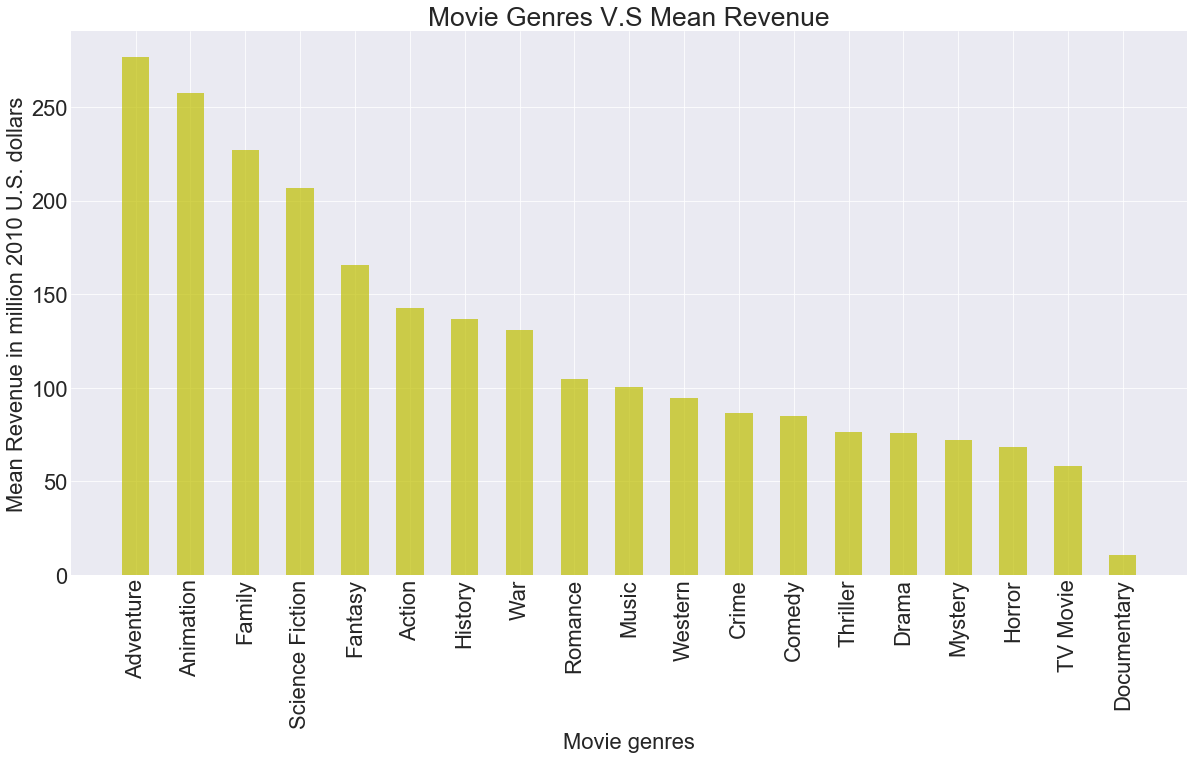

In [31]:
#Plot bar chart of movie genre against mean revenue. 
ind = np.arange(genres_revenue_mean.shape[0])  # the x locations for the groups
width = 0.5
xticks = np.asarray(genres_revenue_mean['genres_new'])
revenue = np.asarray(genres_revenue_mean['revenue_adj'])
                     
plt.bar(ind, revenue, width, color='y', alpha=.7,tick_label=xticks);

# title and labels
plt.ylabel('Mean Revenue in million 2010 U.S. dollars')
plt.xlabel('Movie genres')
plt.xticks(rotation=90)
plt.title('Movie Genres V.S Mean Revenue')

### 3. This section is to investigate the relationship between revenue and popularity


In [32]:
#this is to get the 4 levels of revenue (min, 25%, 50%, 75% and max) 
df_q['revenue_adj'].describe()

count    4848.000000
mean      115.122332
std       198.870573
min         0.000002
25%        10.464773
50%        43.964048
75%       131.652432
max      2827.123750
Name: revenue_adj, dtype: float64

In [33]:
#Revenue is devided into 4 levels based on min, 25%, 50%, 75% and max 
bin_edges = [0.000002 ,10.465848 ,43.956661 , 131.648236 , 2827.123750]
bin_names =  ['Very_low' ,'Low' ,'High' ,'Very_high']
df_q['revenue_levels'] = pd.cut(df_q['revenue_adj'], bin_edges, labels=bin_names) #add column 'revenue_levels' to main dataframe

In [34]:
df_q.head()

,release_year,genres_new,revenue_adj,popularity,budget_adj,director_new,revenue_levels
0,2015,Action,1392.445893,32.985763,137.999939,Colin Trevorrow,Very_high
1,2015,Action,348.161292,28.419936,137.999939,George Miller,Very_high
2,2015,Adventure,271.619025,13.112507,101.199955,Robert Schwentke,Very_high
3,2015,Action,1902.723130,11.173104,183.999919,J.J. Abrams,Very_high
4,2015,Action,1385.748801,9.335014,174.799923,James Wan,Very_high


Get the mean popularity of each revenue level

In [108]:
#groupby the dataframe by revenue level, and then get the mean poularity of each revenue level
populariy_revenue = df_q.groupby(['revenue_levels'], as_index = False)['popularity'].mean()

In [109]:
populariy_revenue

,revenue_levels,popularity
0,Very_low,0.490816
1,Low,0.671837
2,High,0.984468
3,Very_high,2.028058


It can be seen that, over all, movie with higher revenue receives higher popularity

Text(0.5,1,'Revenue Level V.S Popularity')

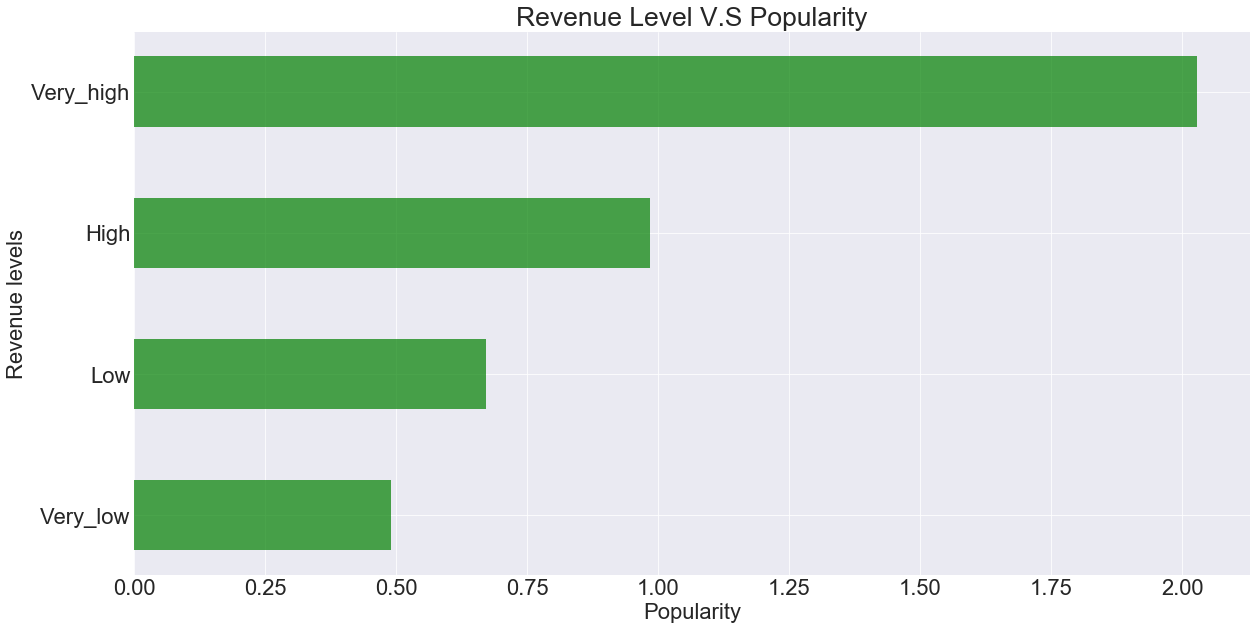

In [37]:
# Plot barchart of 'Revenue Level V.S Popularity'
ind = np.arange(populariy_revenue.shape[0])  # the x locations for the groups
width = 0.5

ticks = np.asarray(populariy_revenue['revenue_levels'])

popularity = np.asarray(populariy_revenue['popularity'])


plt.barh(ind, popularity,width, color='g', alpha=.7, tick_label=ticks);

# title and labels
plt.ylabel('Revenue levels')
plt.xlabel('Popularity')
plt.title('Revenue Level V.S Popularity')

## **Question 2: Which genres are most popular from year to year?**
In this section, the most populer movie genere is explored . 
Each year, the mean polpularity of each genere group is calculated, genere group with the highest popularity is considered as the most popular genere of the year. 
A bar chart is then plotted to show the number of times a genere group become the most popular genere of the year. It shows that Adventure is the most popular genere for 13 years, compare to animation and sci-fi for 8 years. 

In [38]:
# get the mean popularity of each movie genere of each year
popular_generes_year = df_q.groupby(['release_year','genres_new'], as_index = False)['popularity'].mean()
popular_generes_year.head(10)

,release_year,genres_new,popularity
0,1960,Action,1.504538
1,1960,Comedy,0.376889
2,1960,Drama,2.610362
3,1961,Action,0.754548
4,1961,Adventure,2.631987
5,1961,Comedy,0.782032
6,1961,Drama,0.410515
7,1961,Horror,0.249542
8,1961,Music,0.900245
9,1961,Western,0.173731


In [39]:
# get the most popular movie genere of each year
popular_generes_year = popular_generes_year[['release_year','genres_new','popularity']].iloc[popular_generes_year.groupby('release_year')['popularity'].idxmax()]


In [40]:
# count the number of most popular movie genere across all years
popular_generes = popular_generes_year['genres_new'].value_counts()

Text(0.5,1,'Most popular genere')

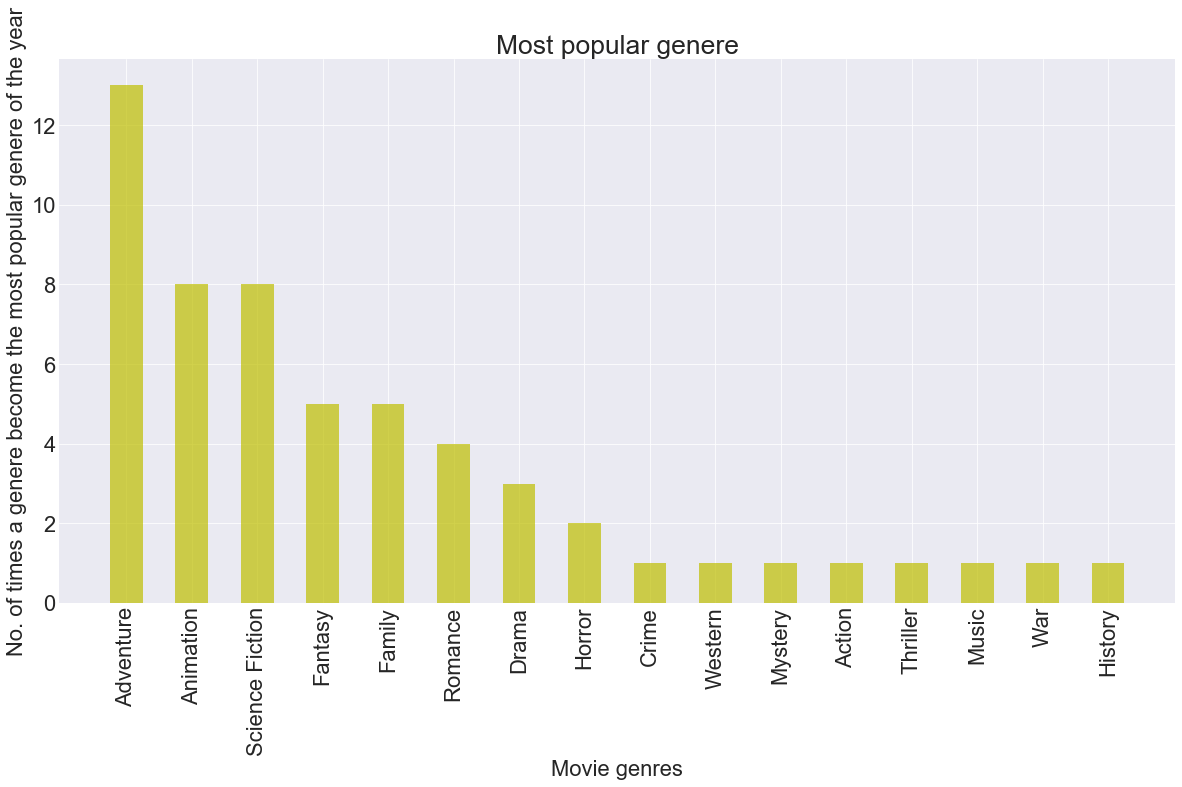

In [41]:
#Plot bar chart of movie genre against mean revenue. 
ind = np.arange(popular_generes.shape[0])  # the x locations for the groups
width = 0.5
xticks = np.asarray(popular_generes.axes)
revenue = np.asarray(popular_generes.values)

                     
plt.bar(ind, revenue, width, color='y', alpha=.7,tick_label=xticks[0,:]);

# title and labels
plt.ylabel('No. of times a genere become the most popular genere of the year')
plt.xlabel('Movie genres')
plt.xticks(rotation=90)
plt.title('Most popular genere')

From the above figure it can be see that Adventure is the most popular genere for 13 times which makes it the most popular movie genere from year 1960 to 2015. 

## Question 2:  Revenue/budget changes over the years
This section is to investigate the change of revenue and budget over the years.  
First, each year's total revenue and total budget is calculated. Two-year moving average is then plotted . It can be seen that overall both revenue and budget is increasing over the years. 
Next, the percentage change of total revenue and budget betwee a specific year and its previous year is calculated and plotted. it can be seen that after 1980, the change of revenue and budget is more stable.   


In [97]:
# get the per year total revenue and budget
year_total = df_q.groupby(['release_year'], as_index = False)['revenue_adj','budget_adj'].sum()

#set index to year
year_total.set_index('release_year',inplace=True)

# cal culate 2 year moving average
year_total_average=year_total.rolling(window=2).mean()



Text(0.5,0,'Year')

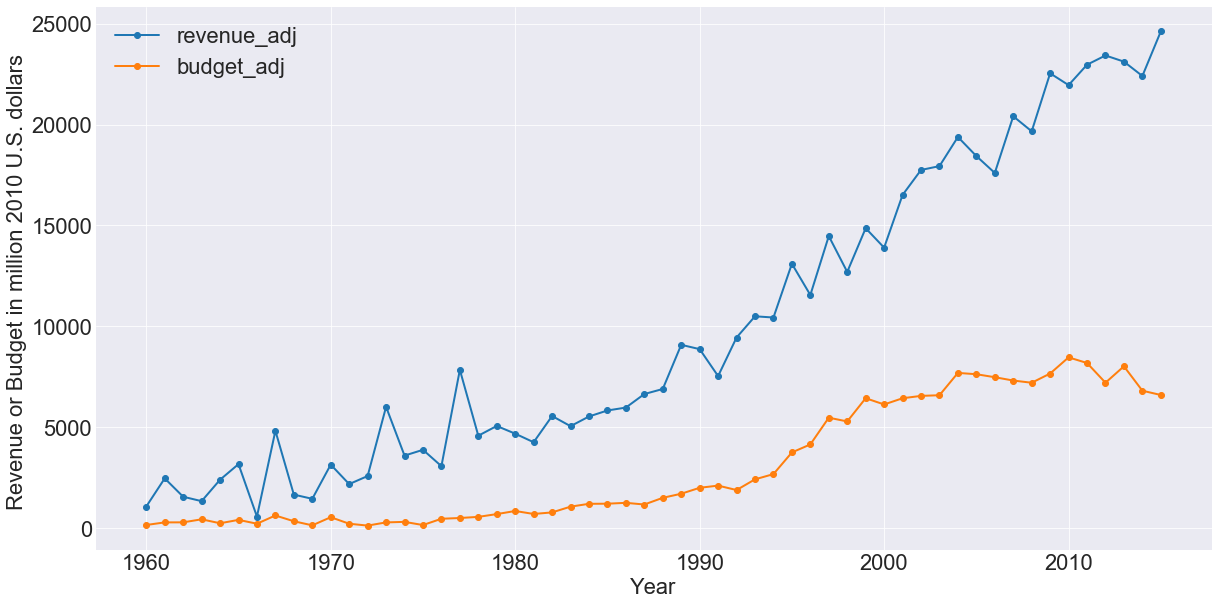

In [101]:
# line plot of the total revenue and butget for each year
year_total.plot(marker = 'o', lw=2);

plt.ylabel('Revenue or Budget in million 2010 U.S. dollars ')
plt.xlabel('Year')

In [99]:
# to get the percentage change between two consecutive years
change_rate=year_total.pct_change()*100

Text(0.5,1,'Movie Genres V.S Revenue')

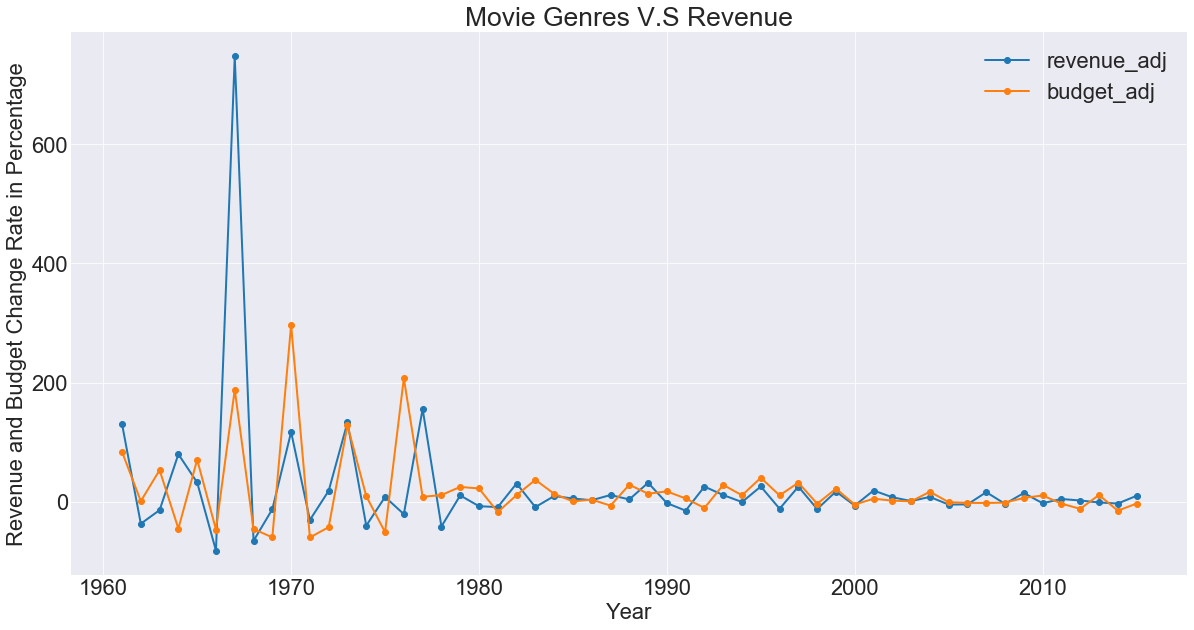

In [84]:
# plot the line chart
change_rate.plot( marker = 'o', lw=2);

plt.ylabel('Revenue and Budget Change Rate in Percentage')
plt.xlabel('Year')

<a id='conclusions'></a>
## Conclusions

This report explores the following questions 

Question 1 - The properties that associte to the high revenue (adjusted to 2010 U.S. dollers) movies.
1. Findings
    1. The distribution of revenue is heavily right skewed. Almost 55% of movie have less than 56 million  revenu 
    2. The top 5 generes of high revenue movies are: Adventure, Animation, Family, Fantacy. NOTE that this conclusion is based on the mean revenue. There might be different top ranking generes if median revenue is used.
    3. Revenues are devided into 4 levels based on [min, first quartile, second quartile, third quartile,Max]. Movies with higher revenue ususly receives higher popularity. 
2. Limitations
more than half of the movies are missing revenue and budget therefor are dropped before conducting the analysis. The potential problem is the remaining movies used for analysis could not represent the population correctly which could lead to wrong conclusion.   
    

Question 2 - the most populer movie genere
It shows that Adventure is the most popular genere for 13 years, compare to the second popular genere of animation and sci-fi which is the top genere for 8 years.


Question 3 - Revenue/budget changes over the years
1. both revenue and budget is increasing over the years. 
2. After 1980, there is a more stable percentage change of total revenue and budget betwee a specific year and its previous year. 